In [10]:
import cv2
import matplotlib.pyplot as plt

pathCustom = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing',
              '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing']
for ipath in pathCustom:
    if not(ipath in sys.path):
        print(f'Adding path:{ipath}')
        sys.path.append(ipath)

# import wedoimage as wedoimg
# from wedoimage import*
import wedoimage as wedoimg
import wedosignal as wedosig

(694, 658, 3)


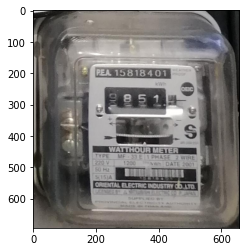

In [21]:
maxIntense = 255

flagRead=1 
# folderImg='/Users/pannawis/Projects/01_SmartMeter/images/BoxMeter_out_resnet'
folderImg='/Users/pannawis/Projects/01_SmartMeter/images/BoxMeter_resnet_byBrand/Mitsu_5'
folderSave = '/Users/pannawis/Projects/01_SmartMeter/images/FrameDigit_mitsu2_ju'
if not os.path.exists(folderSave):
    os.makedirs(folderSave)

# nameImg='1_IMG_20210530_164439.jpg'
nameImg='2_IMG_20210525_075300.jpg'

myMet=cv2.imread(os.path.join(folderImg,nameImg),flagRead)
sSymbol = cv2.imread('/Users/pannawis/Projects/01_SmartMeter/images/Symbol/Mitsu_s.png')

# myMet=cv2.imread(r'/Users/pannawis/Projects/01_SmartMeter/images/RealEnviron/IMG_20210518_104256.jpg',flagRead)
print(myMet.shape)
wedoimg.imshowCV(myMet)

In [22]:
# Read the query image as query_img
# and traing image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg  
   
# Convert it to grayscale
sSymbol_bw = cv2.cvtColor(sSymbol,cv2.COLOR_BGR2GRAY) # query
myMet_bw = cv2.cvtColor(myMet, cv2.COLOR_BGR2GRAY) # train
   
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# compute the descriptors with ORB
queryKeypoints, queryDescriptors = orb.detectAndCompute(sSymbol_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(myMet_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
   
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(sSymbol, queryKeypoints, myMet, trainKeypoints, matches[:20],None)
   
final_img = cv2.resize(final_img, (1000,650))
  
# Show the final image
cv2.imshow("Matches", final_img)
cv2.waitKey(3000)

-1

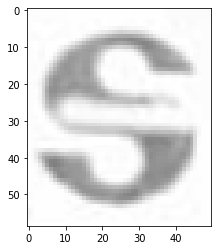

In [23]:
wedoimg.imshowCV(sSymbol_bw)

In [24]:
import cv2

# good
#img1 = cv2.imread('book_cover.jpg', 0)
# rotate
# img2 = cv2.imread('book_cover_rotated.jpg', 0)

img1 = myMet_bw
img2 = sSymbol_bw

orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
cv2.imshow('Matches', match_img)
cv2.waitKey()

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-k95y01np/opencv/modules/core/src/batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'
